# K-Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a set of data points into distinct groups or clusters based on their features. 

The goal of K-means clustering is to divide the data into clusters in such a way that points within the same cluster are more similar to each other compared to points in other clusters. 

This algorithm is commonly used for data analysis, pattern recognition, and various other applications in fields like computer vision, data mining, and customer segmentation.

### EDA on Mall_Customers Dataset

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Check the dimensions of dataset

df.shape

(200, 5)

In [4]:
# Check data types of each column

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values

In [6]:
# Check for duplicate values

df.duplicated().sum()

0

In [7]:
# Calculate summary statistics

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include= 'O')

,Genre
count,200
unique,2
top,Female
freq,112


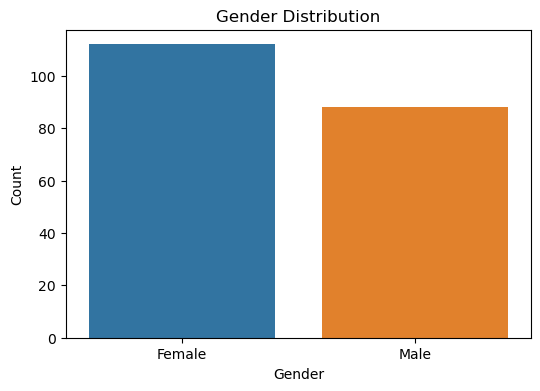

In [9]:
# Distribution of gender

gender_counts = df['Genre'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

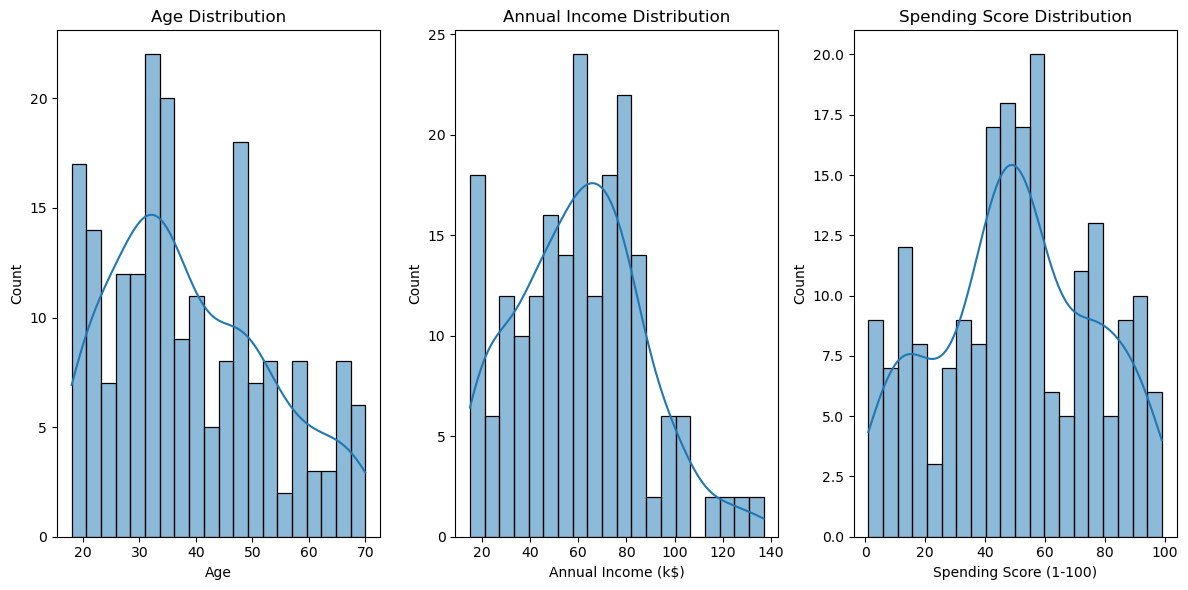

In [10]:
# Subplots 

plt.figure(figsize=(12,6))

# Distribution of age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Distribution of annual income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')


# Distribution of spending score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

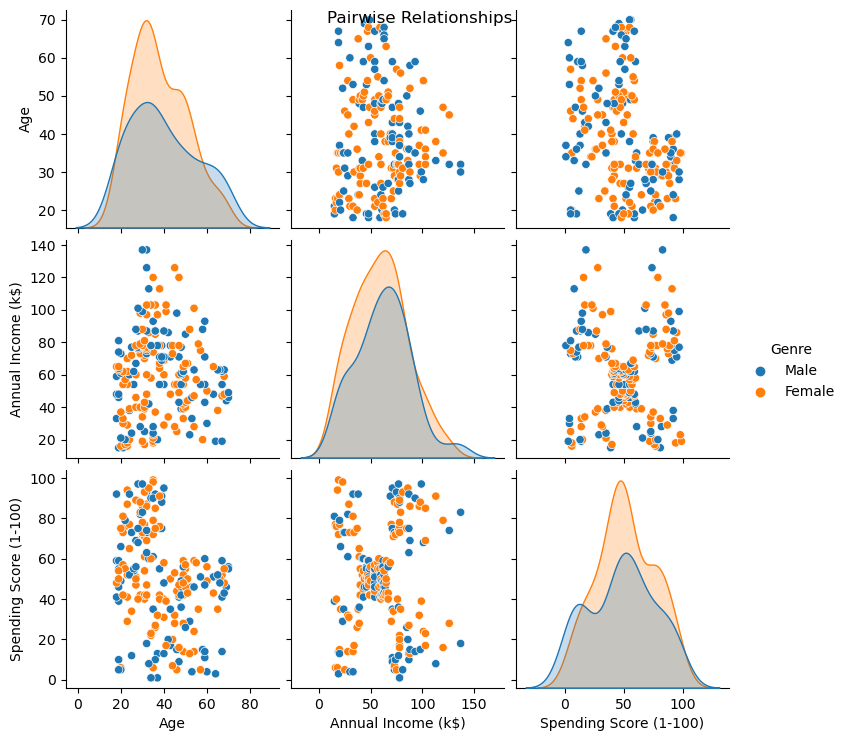

In [11]:
# Pairwise relationships using pairplot

sns.pairplot(df.drop('CustomerID', axis=1), hue='Genre', diag_kind='kde')
plt.suptitle('Pairwise Relationships')
plt.show()


### Building K-Means Clustering Model

In [12]:
# Select features for clustering

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [13]:
# Standardize the features (optional but recommended for k-means)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

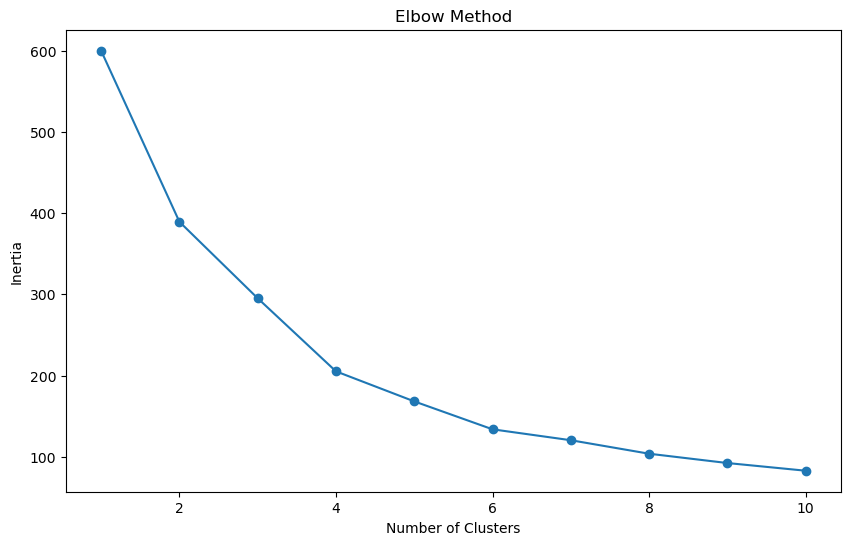

In [14]:
# Determine optimal number of clusters using the Elbow Method

from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

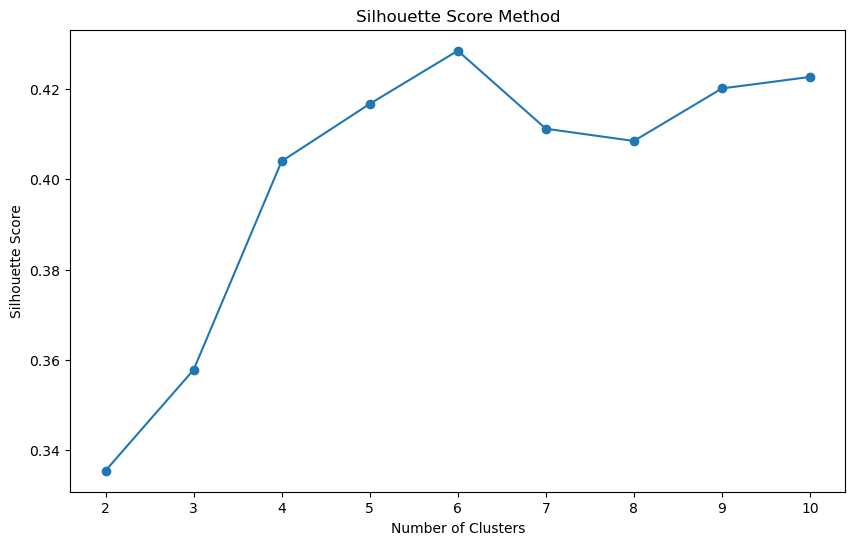

In [15]:
# Determine optimal number of clusters using Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [16]:
# Perform k-means clustering

# Choose the number of clusters (K)
num_clusters = 6  # Based on the elbow method and Silhouette Score the number of clusters = 6

# Initialize KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Perform clustering- Fit the model to the data
cluster_labels = kmeans.fit_predict(X_scaled)

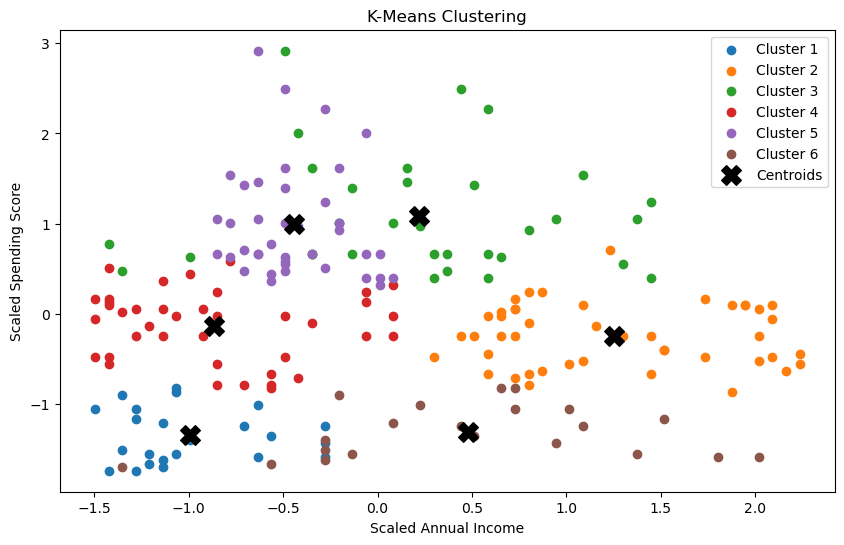

In [17]:
# Visualize the clusters

plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

In [18]:
# Display the first few rows of the updated dataset

updated_data = pd.DataFrame(X_scaled, columns=['Age', 'Standardized Annual Income', 'Standardized Spending Score'])
print(updated_data.head())

        Age  Standardized Annual Income  Standardized Spending Score
0 -1.424569                   -1.738999                    -0.434801
1 -1.281035                   -1.738999                     1.195704
2 -1.352802                   -1.700830                    -1.715913
3 -1.137502                   -1.700830                     1.040418
4 -0.563369                   -1.662660                    -0.395980


In [19]:
# Model Evaluation

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluate clustering using various metrics
silhouette_avg = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.4463113348008403
Davies-Bouldin Index: 0.7645814131023184
Calinski-Harabasz Index: 160.47585788085686


- The silhouette score ranges from -1 to 1. A higher silhouette score indicates that the data points are well-clustered and that they are closer to the data points. A score of 0.446 suggests that the clustering is reasonable but could potentially be improved.

- The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin index indicates better clustering, with values closer to 0 being better. A lower value of 0.764 suggests that the clusters are less overlapping and better separated.

- The Calinski-Harabasz index, also known as the Variance Ratio Criterion, measures the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz index suggests that the clusters are well-separated and distinct. A higher value of 160.475 suggests that the clusters are more distinct.

In summary, based on these evaluation metrics, your K-means clustering results are reasonable, but there might be some room for improvement. 

In [20]:
# New data for prediction
new_data = np.array([[25, 60, 40]])  # Example new data: Age=25, Annual Income=60, Spending Score=40
new_data_scaled = scaler.transform(new_data)

# Predict cluster for new data
new_data_cluster = kmeans.predict(new_data_scaled)

print(f"Predicted Cluster for New Data: {new_data_cluster[0]}")

Predicted Cluster for New Data: 3


Predicted Cluster for New Data: 3


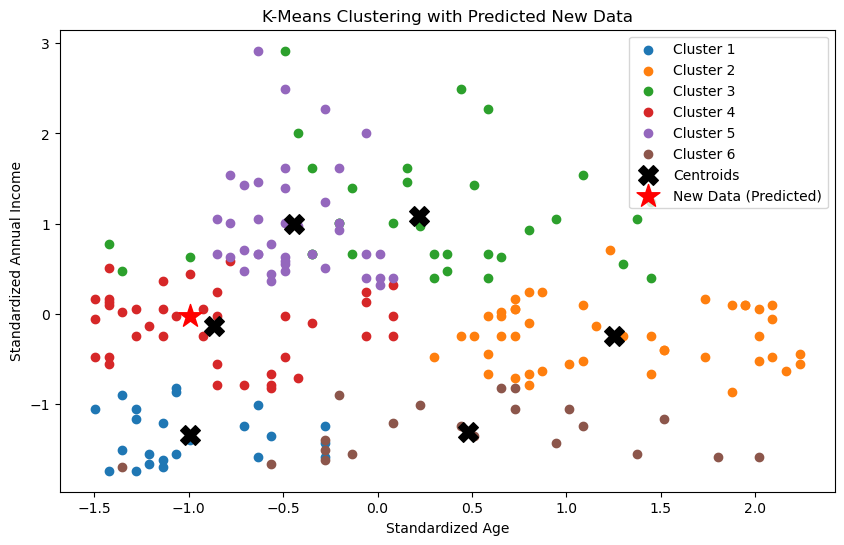

In [21]:
# New data for prediction
new_data = np.array([[25, 60, 40]])  # Example new data: Age=25, Annual Income=60, Spending Score=40
new_data_scaled = scaler.transform(new_data)

# Predict cluster for new data
new_data_cluster = kmeans.predict(new_data_scaled)

print(f"Predicted Cluster for New Data: {new_data_cluster[0]}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.scatter(new_data_scaled[:, 0], new_data_scaled[:, 1], c='red', marker='*', s=300, label='New Data (Predicted)')
plt.title('K-Means Clustering with Predicted New Data')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income')
plt.legend()
plt.show()


Predicted Clusters for New Data Points:
Data Point 1: Predicted Cluster 3
Data Point 2: Predicted Cluster 2
Data Point 3: Predicted Cluster 0


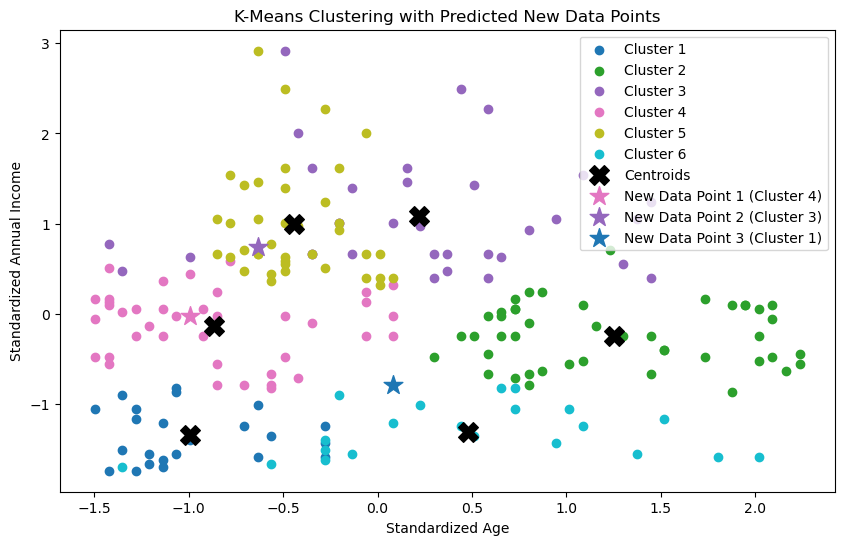

In [23]:
# New data for prediction
new_data_points = np.array([
    [25, 60, 40],
    [30, 80, 20],
    [40, 40, 80]
])  # Example set of new data points: [Age, Annual Income, Spending Score]

new_data_points_scaled = scaler.transform(new_data_points)

# Predict clusters for new data points
new_data_clusters = kmeans.predict(new_data_points_scaled)

print("Predicted Clusters for New Data Points:")
for idx, cluster in enumerate(new_data_clusters):
    print(f"Data Point {idx+1}: Predicted Cluster {cluster}")
    
# Get cluster colors
cluster_colors = plt.cm.get_cmap('tab10', num_clusters)

# Visualize the clusters and new data points
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_scaled[cluster_labels == i, 0], X_scaled[cluster_labels == i, 1], c=[cluster_colors(i)], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

# Plot new data points with matching cluster colors
for idx, cluster in enumerate(new_data_clusters):
    plt.scatter(new_data_points_scaled[idx, 0], new_data_points_scaled[idx, 1], c=[cluster_colors(cluster)], marker='*', s=200, label=f'New Data Point {idx+1} (Cluster {cluster+1})')

plt.title('K-Means Clustering with Predicted New Data Points')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Annual Income')
plt.legend()
plt.show()
